In [607]:
#importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [608]:
#load the data
df=pd.read_csv("C:/Users/Dell/Desktop/datasets/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [609]:
#count the number of rows and columns in a dataset
df.shape

(891, 12)

In [610]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [612]:
df.size

10692

In [613]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [614]:
#correlation b/t all columns with survived
df.corr().Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [615]:
np.unique(df['Survived'])

array([0, 1], dtype=int64)

In [616]:
#get the count of number of survivers(0-indicates not survived, 1-indicates survived)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

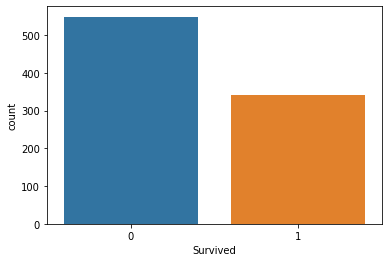

In [617]:
#visualize the count of survivers
sns.countplot(df['Survived'])

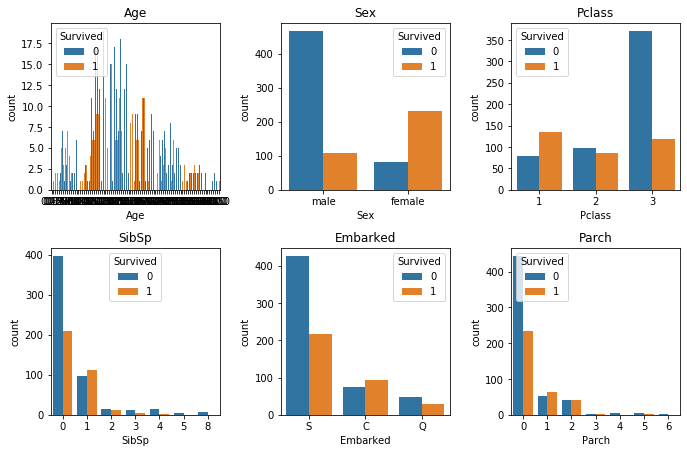

In [618]:
#visualize the count of survivors of columns 'sex','pclass','sibsp','embarked','parch'
cols=['Age','Sex','Pclass','SibSp','Embarked','Parch']
n_rows=2
n_cols=3
#the subplot grid and figure size of each graph
fig, axs=plt.subplots(n_rows, n_cols, figsize=(n_cols *3.2, n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols + c # index to go through the number of columns
        ax=axs[r][c] #show where to position each subplot
        sns.countplot(df[cols[i]],hue=df['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived', loc='Upper right')
plt.tight_layout()
        

In [619]:
#Look at the survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


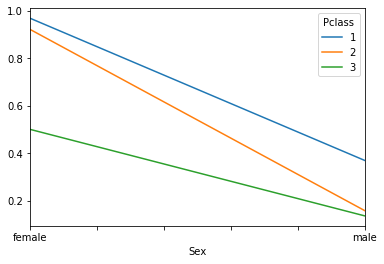

In [620]:
#Visually Look at survival rate by sex and class
df.pivot_table('Survived', index='Sex', columns='Pclass').plot()

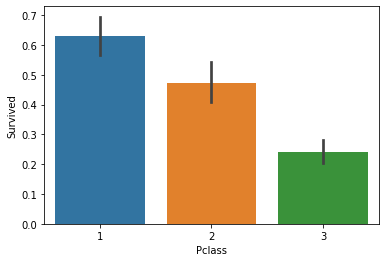

In [621]:
#plot the survival rate of each class
sns.barplot(x='Pclass', y='Survived',data=df)

In [622]:
#Look ata the survival rate by sex,age and class
Age=pd.cut(df['Age'],[0,18,80])
df.pivot_table('Survived', ['Sex',Age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [623]:
#count the empty values in each column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [624]:
#Look at all of the values in each column and get a count
for val in df:
    print(df[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Van der hoef, Mr. Wyckoff                                                             1
Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)    1
Levy, Mr. Rene Jacques                                                                1
Parr, Mr. William Henry Marsh                                                         1
Rice, Mrs. William (Margaret Norton)                                                  1
                                                                                     ..
Beane, Mr. Edward                                                                     1
Vander Cruyssen, Mr. Victor                                                           1
Bryhl, Mr. Kurt Arnold Gottfrid                 

In [625]:
#remove the rows with missing values
df=df.dropna(subset=['Embarked','Age'])

In [626]:
#Look at the data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [627]:
#drop some columns
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [628]:
#Look at the data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

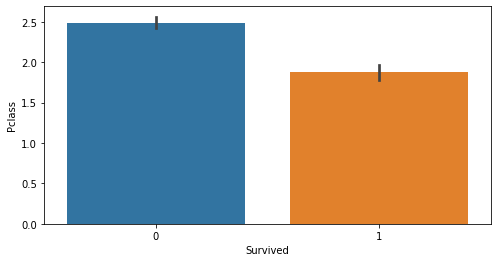

In [629]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'Survived', y = 'Pclass', data = df)

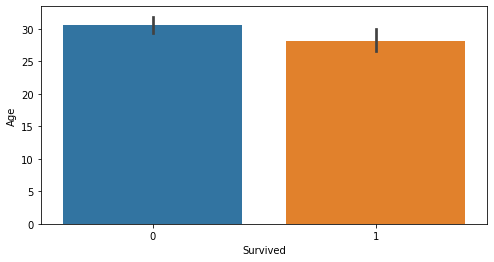

In [630]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'Survived', y = 'Age', data = df)

In [631]:
#print the unique values in the columns before encoding
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [632]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Encode the sex column
df.iloc[:,2]=le.fit_transform(df.iloc[:,2].values)

#Encode the Embarked column
df.iloc[:,7]=le.fit_transform(df.iloc[:,7].values)

In [633]:
#print the unique values in the columns after encoding
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


In [634]:
#check the data types of columns
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [635]:
df.isna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [636]:
#split the data into independent 'X' and dependent 'Y' variables
X=df.iloc[:,1:8].values
Y=df.iloc[:,0].values

In [637]:
X.size

4984

In [638]:
Y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [639]:
from collections import Counter
print(Counter(Y))

Counter({0: 424, 1: 288})


In [640]:
N, D = X.shape

In [641]:
print(N) #rows
print(D) #columns

712
7


In [642]:
ones = np.ones((N,1))

In [643]:
Xb = np.concatenate((X, ones), axis = 1)
Xb

array([[ 3.    ,  1.    , 22.    , ...,  7.25  ,  2.    ,  1.    ],
       [ 1.    ,  0.    , 38.    , ..., 71.2833,  0.    ,  1.    ],
       [ 3.    ,  0.    , 26.    , ...,  7.925 ,  2.    ,  1.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ..., 30.    ,  2.    ,  1.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  0.    ,  1.    ],
       [ 3.    ,  1.    , 32.    , ...,  7.75  ,  1.    ,  1.    ]])

In [644]:
Xb.shape

(712, 8)

In [645]:
w = np.random.randn(D + 1)
w

array([-1.0966075 ,  0.92467497, -0.86403118, -0.99199108,  0.17231998,
       -2.71579292,  0.21285165,  0.08889569])

In [646]:
from sklearn.utils import shuffle
Xb, Y = shuffle(Xb, Y, random_state = 0)

In [647]:
Xb

array([[  3.    ,   0.    ,  28.    , ...,  14.4   ,   2.    ,   1.    ],
       [  2.    ,   1.    ,  30.    , ...,  13.    ,   2.    ,   1.    ],
       [  1.    ,   1.    ,   0.92  , ..., 151.55  ,   2.    ,   1.    ],
       ...,
       [  2.    ,   1.    ,  16.    , ...,  26.    ,   2.    ,   1.    ],
       [  2.    ,   1.    ,  39.    , ...,  26.    ,   2.    ,   1.    ],
       [  3.    ,   0.    ,  24.    , ...,  19.2583,   0.    ,   1.    ]])

In [648]:
Y

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [649]:
#training 80% and testing 20%
X_train = Xb[:569]
X_test = Xb[569:]
Y_train = Y[:569]
Y_test = Y[569:]

In [650]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(569, 8)
(143, 8)
(569,)
(143,)


In [651]:
X_train

array([[  3.    ,   0.    ,  28.    , ...,  14.4   ,   2.    ,   1.    ],
       [  2.    ,   1.    ,  30.    , ...,  13.    ,   2.    ,   1.    ],
       [  1.    ,   1.    ,   0.92  , ..., 151.55  ,   2.    ,   1.    ],
       ...,
       [  2.    ,   1.    ,  66.    , ...,  10.5   ,   2.    ,   1.    ],
       [  1.    ,   1.    ,  24.    , ...,  79.2   ,   0.    ,   1.    ],
       [  3.    ,   1.    ,  36.    , ...,   7.8958,   2.    ,   1.    ]])

In [652]:
X_test

array([[ 3.    ,  0.    , 19.    , ...,  7.8542,  2.    ,  1.    ],
       [ 2.    ,  0.    , 40.    , ..., 39.    ,  2.    ,  1.    ],
       [ 1.    ,  1.    , 36.    , ..., 40.125 ,  0.    ,  1.    ],
       ...,
       [ 2.    ,  1.    , 16.    , ..., 26.    ,  2.    ,  1.    ],
       [ 2.    ,  1.    , 39.    , ..., 26.    ,  2.    ,  1.    ],
       [ 3.    ,  0.    , 24.    , ..., 19.2583,  0.    ,  1.    ]])

In [653]:
Y_train

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [654]:
Y_test

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [655]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [656]:
X_test

array([[ 3.    ,  0.    , 19.    , ...,  7.8542,  2.    ,  1.    ],
       [ 2.    ,  0.    , 40.    , ..., 39.    ,  2.    ,  1.    ],
       [ 1.    ,  1.    , 36.    , ..., 40.125 ,  0.    ,  1.    ],
       ...,
       [ 2.    ,  1.    , 16.    , ..., 26.    ,  2.    ,  1.    ],
       [ 2.    ,  1.    , 39.    , ..., 26.    ,  2.    ,  1.    ],
       [ 3.    ,  0.    , 24.    , ..., 19.2583,  0.    ,  1.    ]])

In [657]:
Y_test

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [658]:
X_test = shuffle(X_test,random_state = 0)
X_test

array([[  3.    ,   0.    ,  22.    , ...,   9.8375,   2.    ,   1.    ],
       [  3.    ,   0.    ,  29.    , ...,  21.075 ,   2.    ,   1.    ],
       [  3.    ,   0.    ,  18.    , ...,   6.75  ,   1.    ,   1.    ],
       ...,
       [  2.    ,   0.    ,  45.    , ...,  13.5   ,   2.    ,   1.    ],
       [  3.    ,   1.    ,  24.    , ...,   7.1417,   2.    ,   1.    ],
       [  1.    ,   1.    ,  19.    , ..., 263.    ,   2.    ,   1.    ]])

In [659]:
print(Y_test)

[1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1]


In [660]:
z = X_test.dot(w)

In [661]:
z

array([ -48.50052233,  -84.37818365,  -36.87223861, -257.3581892 ,
        -53.83007345,  -95.57371378,  -45.88892761,  -43.16662342,
        -43.75907531,  -79.01360171,  -49.63361695,  -61.73005345,
        -82.83969983, -738.20362903,  -85.18905593,  -42.72136751,
       -100.00554587, -117.79559449, -333.30484877, -184.73746949,
       -112.47384297,  -47.46098261,  -56.62585146,  -43.09426561,
       -111.91871458,  -69.81710881,  -78.67175855,  -52.47584145,
        -44.16674638,  -47.73050364, -140.15935034,  -39.25268641,
       -235.84916853,  -37.75418738,  -79.26080799,  -62.60332809,
        -53.08974166,  -76.65729445,  -43.1521772 ,  -72.34855856,
        -25.59641855,  -38.45050492,  -36.36208172,  -51.02220519,
       -215.91728216,  -77.53274564, -112.86232694, -121.23642859,
        -40.54873318,  -53.14223475, -102.51249209, -116.37085051,
       -171.06272629,  -61.63429974,  -46.25189832, -401.70713838,
        -45.49129296,  -82.34676681, -110.64303872,  -72.48774

In [662]:
z.shape

(143,)

In [743]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [744]:
Y_pred = sigmoid(z)

In [751]:
Y_pred

array([1.        , 1.        , 0.99999997, 1.        , 1.        ,
       1.        , 0.99999995, 0.99999991, 0.99999993, 1.        ,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       0.99999989, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999999, 1.        , 0.99999598, 1.        ,
       1.        , 1.        , 0.99999988, 0.99977197, 0.99999999,
       1.        , 0.99999958, 1.        , 0.99999997, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.86957718, 0.9999993 , 0.98837663, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999976, 1.        ,
       1.        , 1.        , 1.        , 0.99998567, 0.99999997,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999959, 1.        , 1.        ,
       1.        , 0.99999999, 0.99999996, 0.99992544, 1.        ,
       0.99999964, 0.99999998, 1.        , 1.        , 0.99999

In [746]:
Yhat = []
for i in Y_pred:
    if i > 0.5:
        Yhat.append(1)
    else:
        Yhat.append(0)

In [747]:
Yhat

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [748]:
s = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Yhat})
s

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1
...,...,...
138,0,1
139,0,1
140,0,1
141,0,1


In [749]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Yhat))

[[ 0 90]
 [ 0 53]]


In [750]:
from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(Y_test, Yhat))

accuracy score: 0.3706293706293706


In [675]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Yhat))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        90
           1       0.00      0.00      0.00        53

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143

